In [106]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [199]:
arma_df = pd.read_csv(r"C:\Users\James Stanley\Desktop\Stocks\BATS_EIDO, 1D.csv",index_col='time', parse_dates=True)

In [200]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

In [201]:
len(log_diff)

3263

In [191]:
import statsmodels.api as sm

acf, ci = sm.tsa.acf(log_diff,nlags=5, alpha=0.05)
pacf, ci = sm.tsa.pacf(log_diff,nlags=5, alpha=0.05)

acf[0]
pacf[4]

0.02486930648191661

In [192]:
ci

array([[ 1.        ,  1.        ],
       [-0.16122621, -0.09761984],
       [-0.01790633,  0.04570004],
       [ 0.00313494,  0.06674131],
       [-0.00693388,  0.05667249],
       [-0.01491533,  0.04869104]])

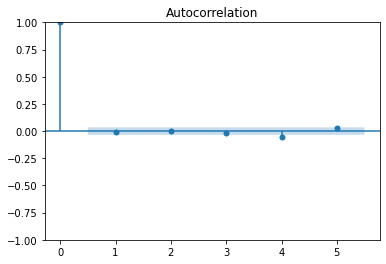

In [202]:
plot_acf(log_diff, alpha=0.05, lags=5).savefig("acf.jpg")

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


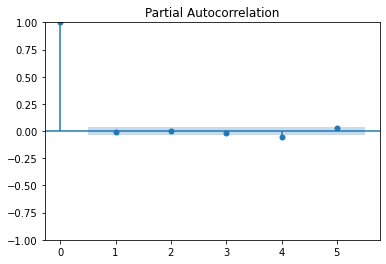

In [203]:
plot_pacf(log_diff, alpha=0.05, lags=5).savefig("pacf.jpg")

In [115]:
print(len(arma_df))

3254


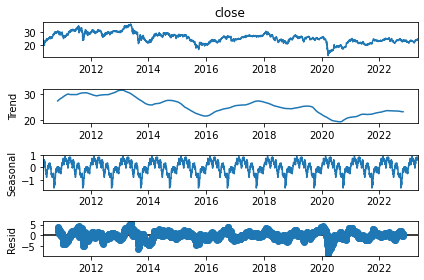

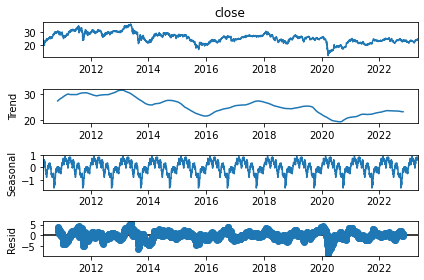

In [204]:
seasonal_result = seasonal_decompose(arma_df['close'], model="additive",period=252)

trend    = seasonal_result.trend
seasonal = seasonal_result.seasonal
residual = seasonal_result.resid

seasonal_result.plot()

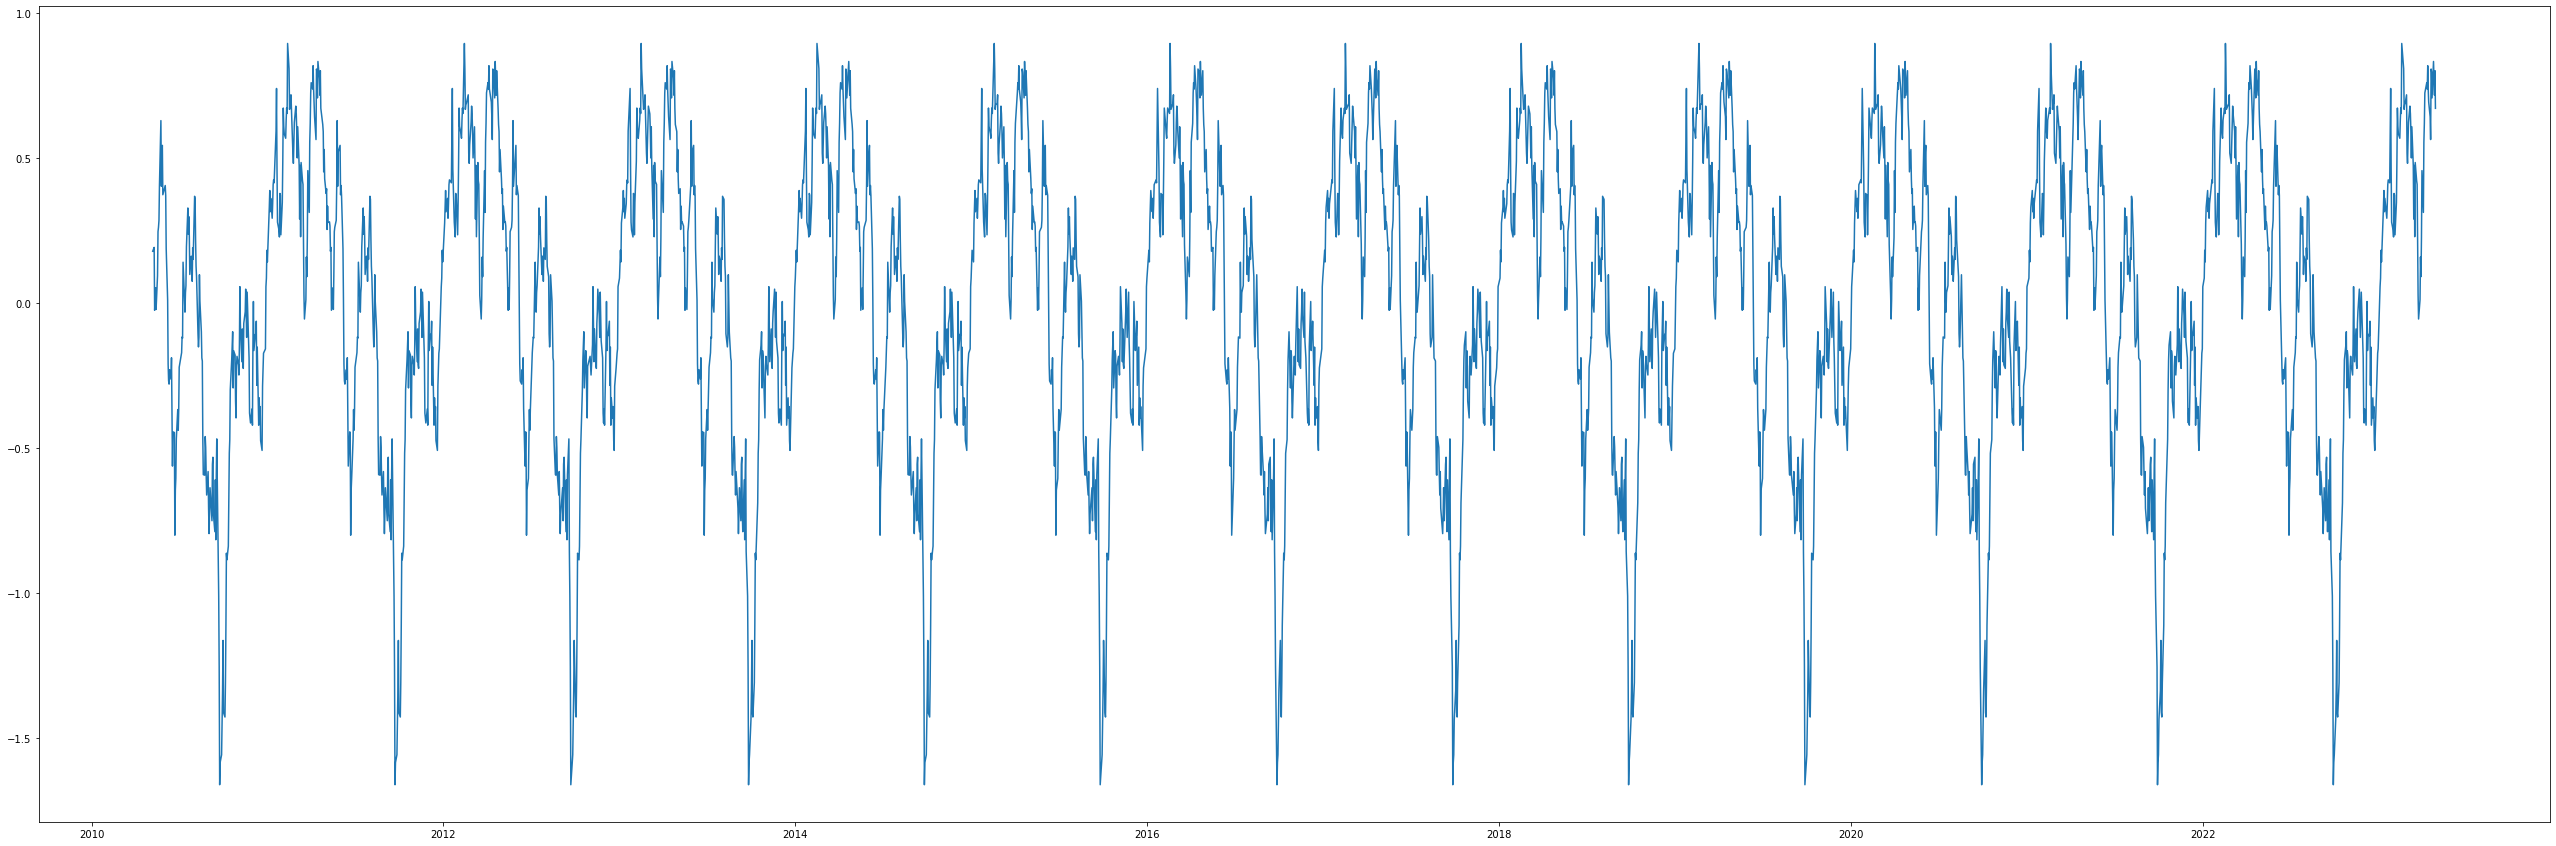

In [205]:
plt.figure(figsize=(45,15))

plt.plot(seasonal)

plt.show()

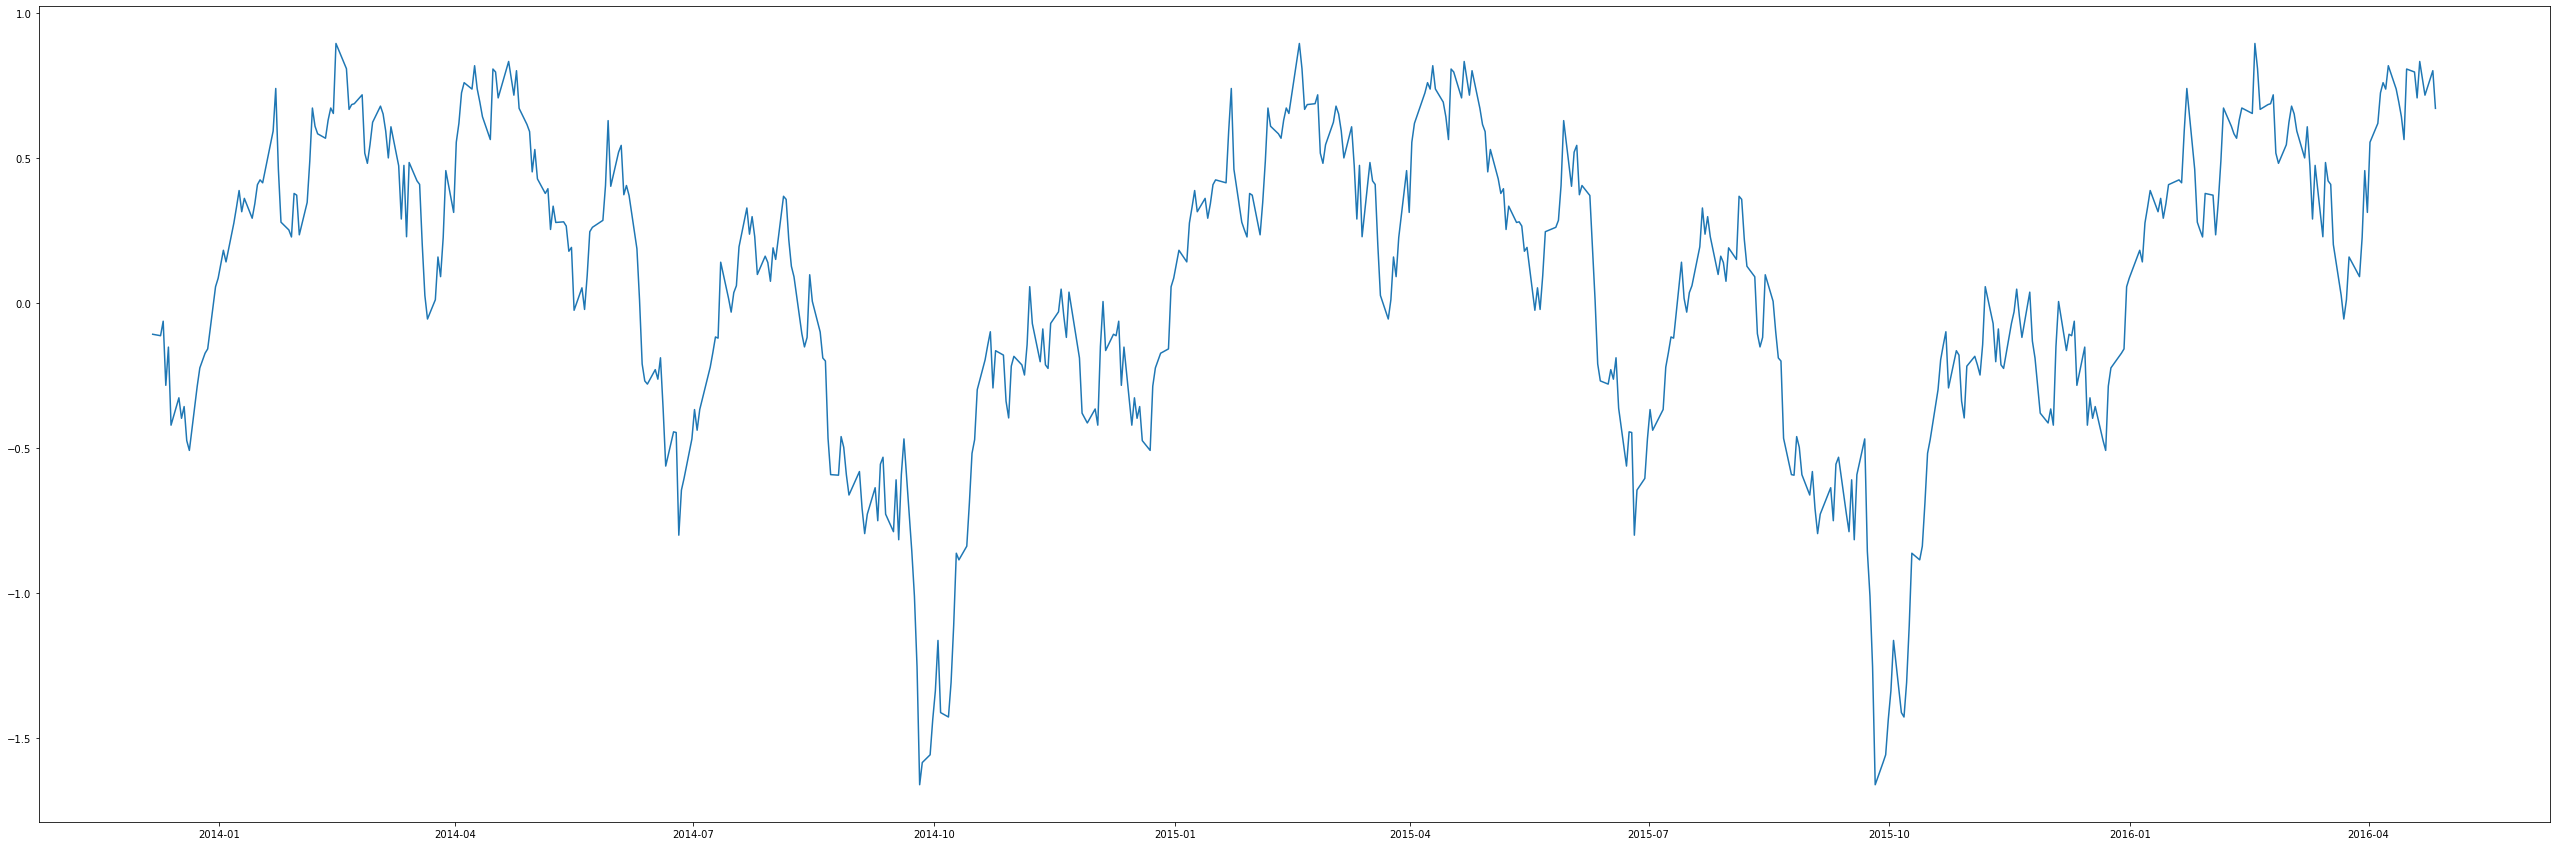

In [206]:
plt.figure(figsize=(45,15))

plt.plot(seasonal[900:1500])

plt.show()

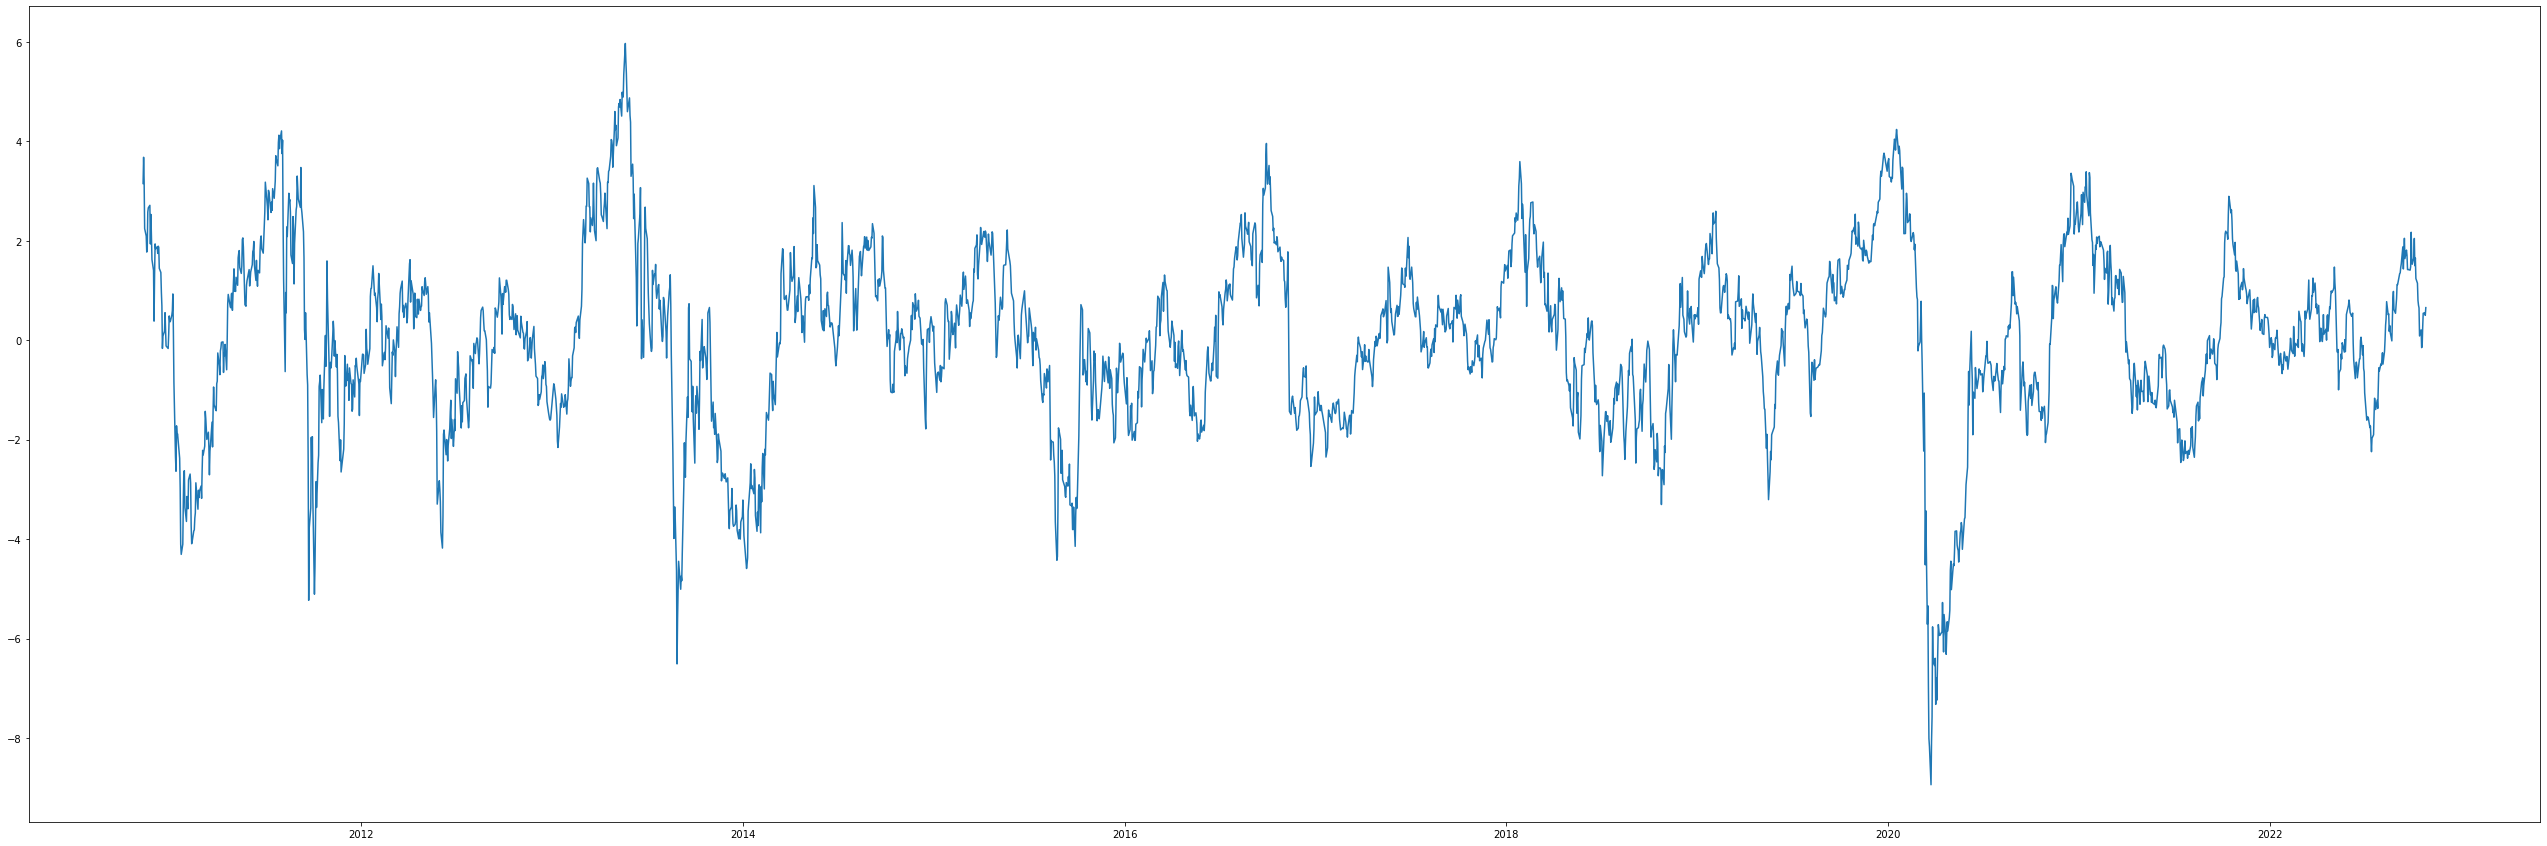

In [207]:
plt.figure(figsize=(45,15))

plt.plot(residual)

plt.show()

In [208]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

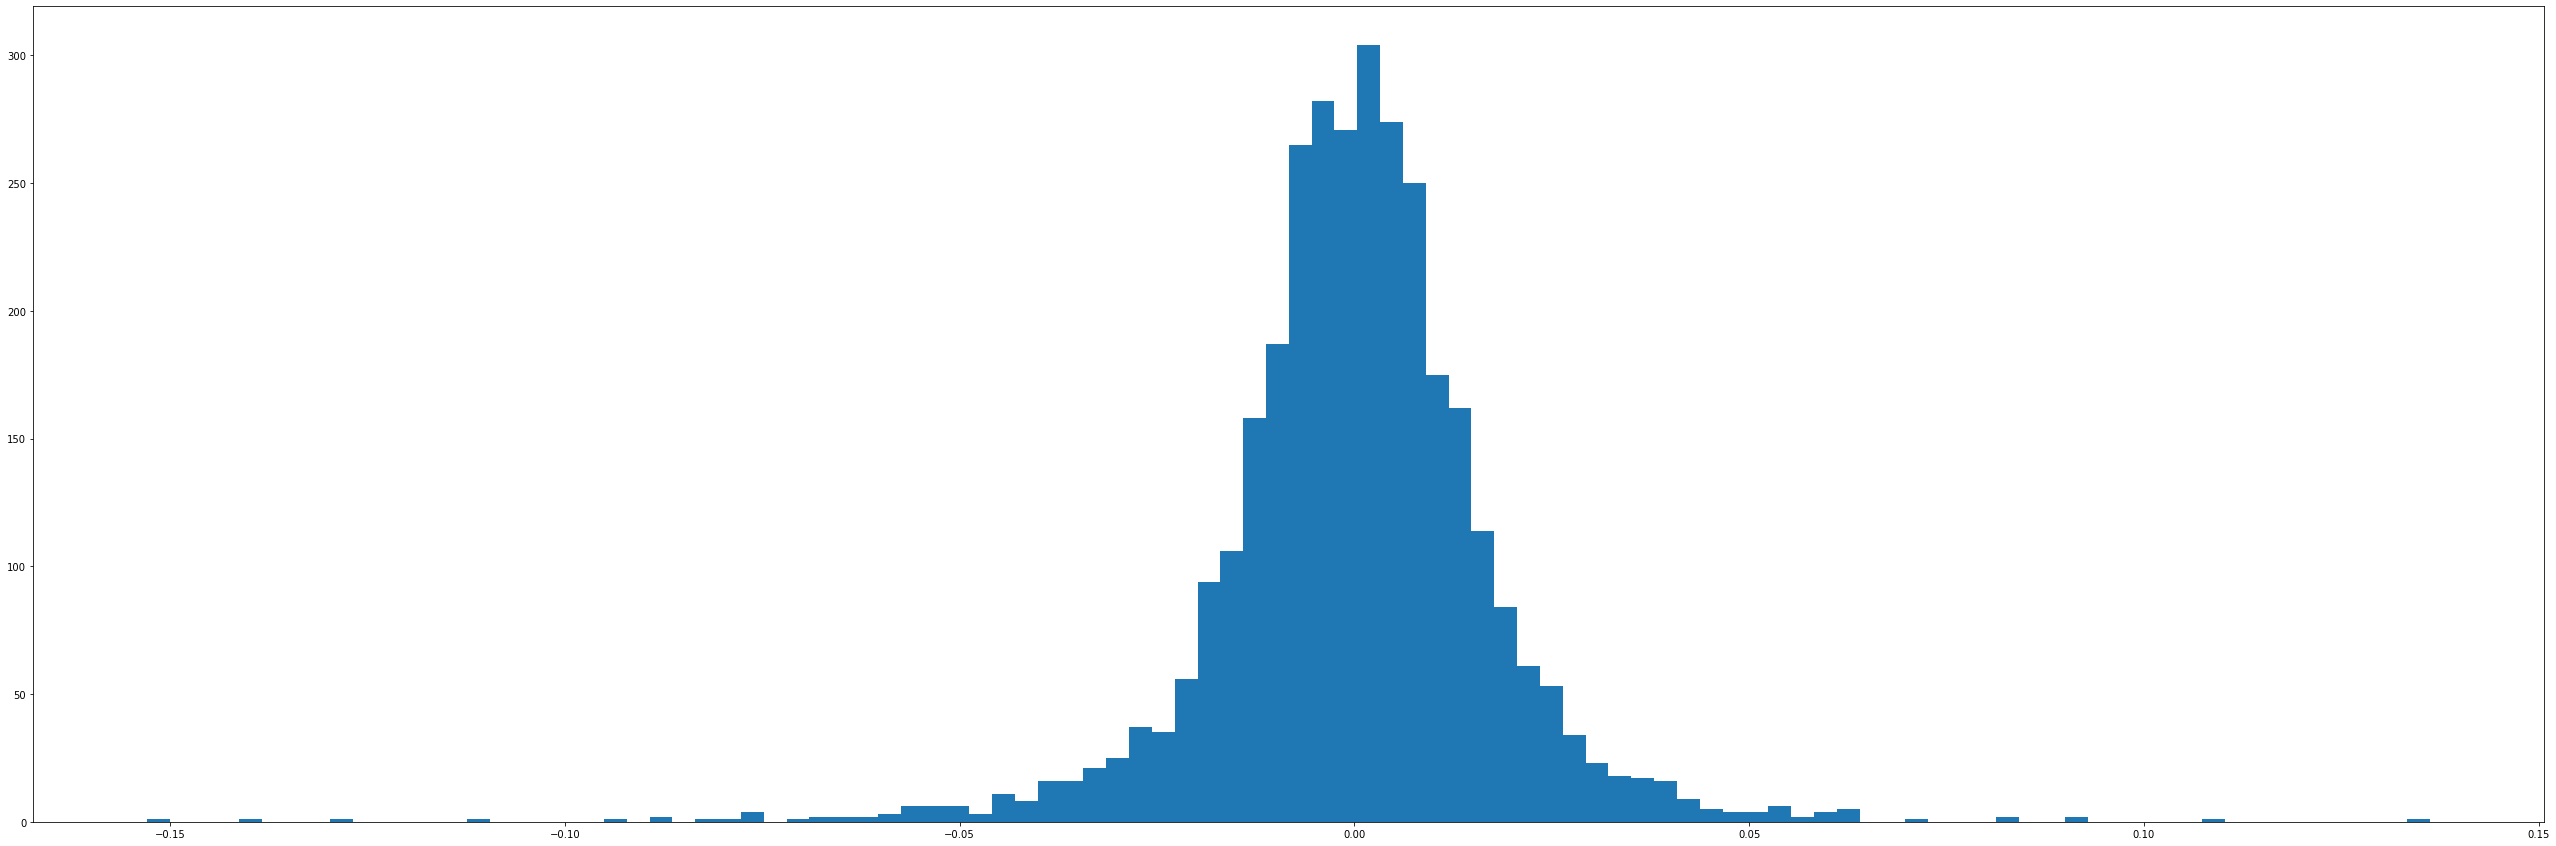

In [209]:
plt.figure(figsize=(45,15))

plt.hist(log_diff,bins=100)

plt.show()

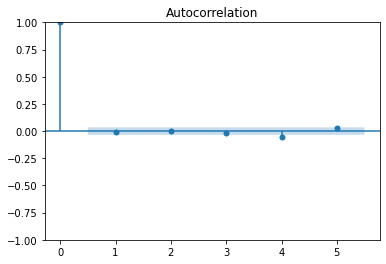

In [210]:
plot_acf(log_diff, alpha=0.05, lags=5).savefig("acf.jpg")

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


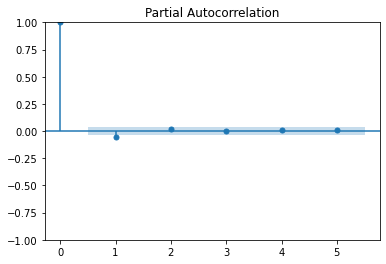

In [124]:
plot_pacf(log_diff, alpha=0.05, lags=5).savefig("pacf.jpg")